# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [3]:
setwd("/Users/yuqizhou/Documents/GitHub/DataSciencePsychNeuro/Homeworks/hcp_data")
df <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(df)
library(tidyverse)
dl <- df %>% select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>% drop_na()
head(dl)


,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

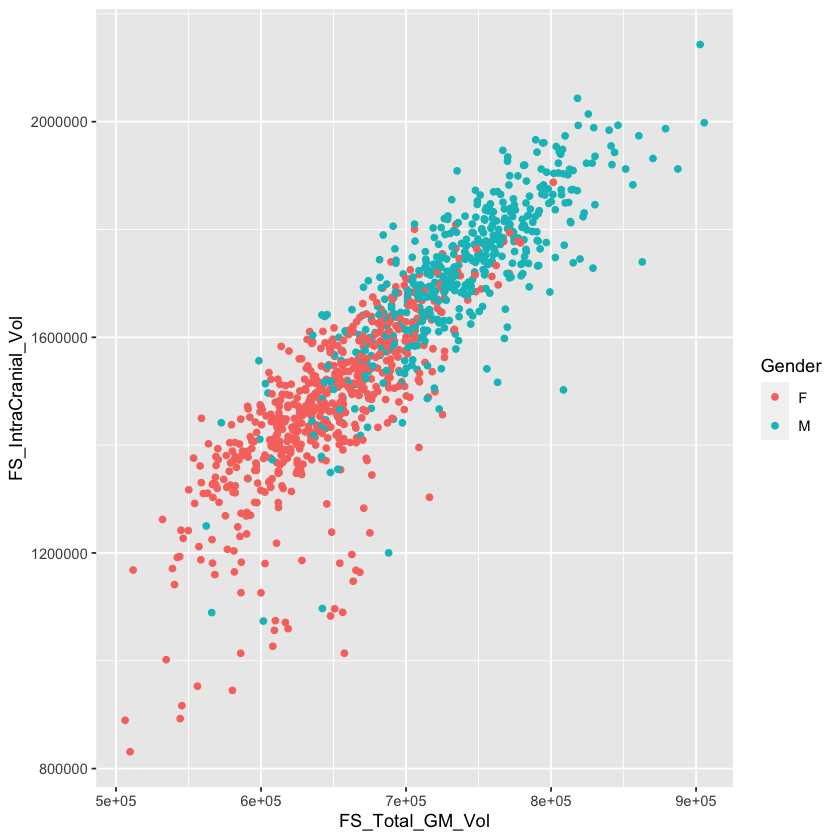

In [4]:
ggplot(dl, aes(x = FS_Total_GM_Vol ,y = FS_IntraCranial_Vol , color = Gender)) + geom_point()

What patterns do you observe in the scatter plot?

> There is a positive relationship between grey matter volume and intracranial volume. Furthermore, there seems to be a difference in gender distribution of the data. Specifically, males seem to have higher grey matter volume and intracranial volume than females.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [5]:
dl <- mutate(dl, Gender = factor(Gender))

lr = glm(Gender~FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol, data = dl, family = binomial)
summary(lr)



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = dl)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Total grey matter volume and intracranial volume are significantly associated with gender. 
 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [6]:
threshold = 0.5
#contrasts(dl$Gender)

lr_prob = data.frame(predict(lr, type = "response"))
colnames(lr_prob) = c('predicted_prob')

num_obs = nrow(lr_prob)
lr_prob$index = seq(1, num_obs)

lr_prob$predicted_binary = rep("F", num_obs)
lr_prob$predicted_binary[lr_prob$predicted_prob>threshold]="M"

confusion_df = data.frame(lr_prob$predicted_binary, dl$Gender)
colnames(confusion_df) = c('predicted','actual')

mean(confusion_df$predicted == confusion_df$actual)



[1] 0.8203055

What is the prediction accuracy for gender from the full model?

>The prediction accuracy for gender from the full model is 82.03%.
> 

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.



The downloaded binary packages are in
	/var/folders/m4/6fskllfx0fd1y5g7qkdx7q2h0000gn/T//RtmpglNf4m/downloaded_packages

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = dl, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.8203055 -0.3151015  0.01428231
[1] "lower CI 0.0286880104"
[1] "higher CI -0.0286880104"


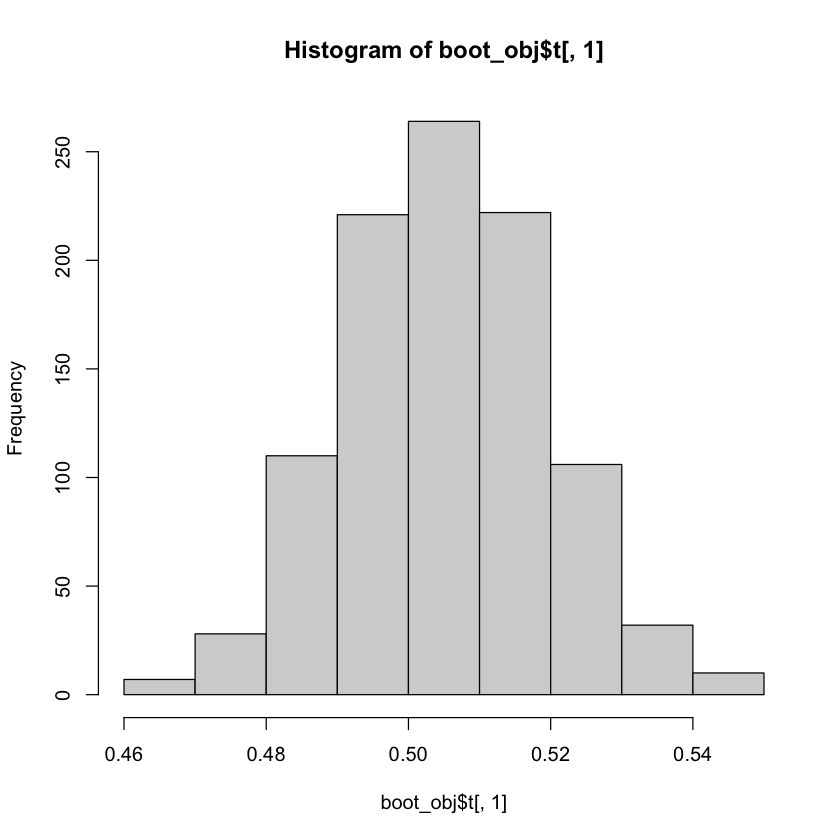

In [27]:
install.packages("boot")
library(boot)
boot.fn <- function(data, index){
    lr = glm(Gender~FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol, data = data, subset=index, family = binomial)

    lr_prob = data.frame(predict(lr, type = "response"))
    colnames(lr_prob) = c('predicted_prob')

    num_obs = nrow(lr_prob)
    lr_prob$index = seq(1, num_obs)

    lr_prob$predicted_binary = rep("F", num_obs)
    lr_prob$predicted_binary[lr_prob$predicted_prob>threshold]="M"

    confusion_df = data.frame(lr_prob$predicted_binary, dl$Gender)
    colnames(confusion_df) = c('predicted','actual')

    acc = mean(confusion_df$predicted == confusion_df$actual)

    return(acc)
}

boot_obj = boot(dl, boot.fn, R=1000)
print(boot_obj)
hist(boot_obj$t[,1])
print(paste("lower CI",0.01463674*1.96))
print(paste("higher CI",0.01463674*-1.96))


How robust is the prediction accuracy of the full model?

> It's not robust as we see the histogram showing the center around 51% accuracy with CI covering 2.87% on either side of the center, which includes 50%, the null value. 
> 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] 0.8054313

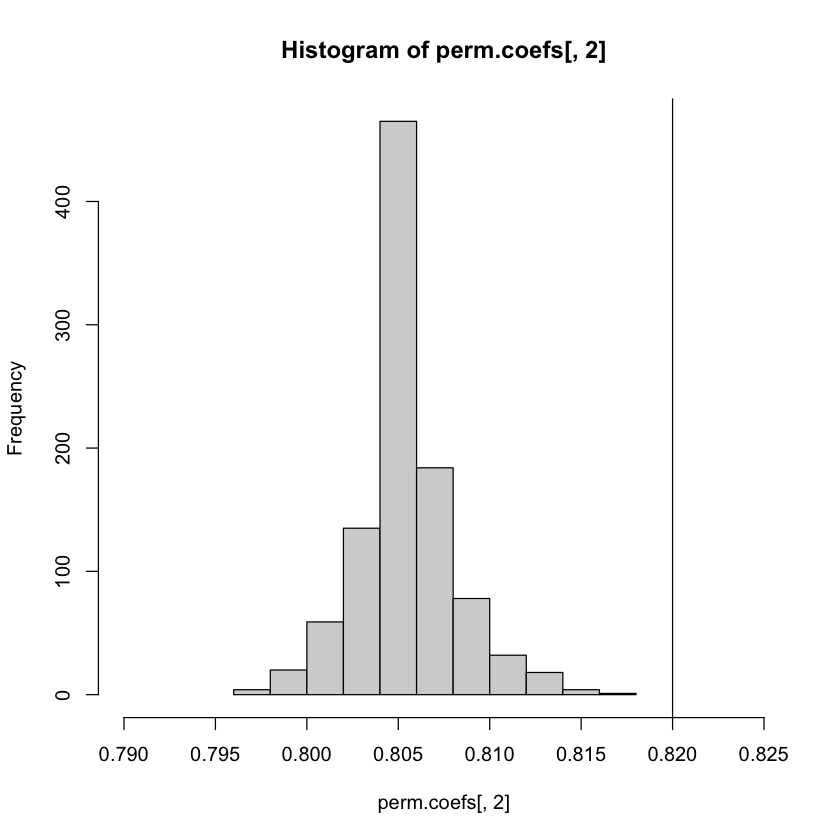

In [40]:
permdl = dl
R = 1000
perm.coefs = matrix(NA, nrow=R, ncol = 2)

for (i in 1:R){
    permdl$FS_Total_GM_Vol = dl$FS_Total_GM_Vol[sample(1113)]
    lr.gm = glm(Gender~FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol, data = permdl, family = binomial)

    lr_prob = data.frame(predict(lr.gm, type = "response"))
    colnames(lr_prob) = c('predicted_prob')

    num_obs = nrow(lr_prob)
    lr_prob$index = seq(1, num_obs)

    lr_prob$predicted_binary = rep("F", num_obs)
    lr_prob$predicted_binary[lr_prob$predicted_prob>threshold]="M"

    confusion_df = data.frame(lr_prob$predicted_binary, dl$Gender)
    colnames(confusion_df) = c('predicted','actual')

    acc = mean(confusion_df$predicted == confusion_df$actual)

    perm.coefs[i,]= acc
}
mean(perm.coefs[,2])
hist(perm.coefs[,2], xlim = c(0.790, 0.825))
abline(v=0.82)

How much does the grey matter volume influence the prediction accuracy of the model?

> Although it seems like the accuracy difference is not a large one between 82.03% and 80.54%, from the histogram we can see how the original accuracy is way on the right outside the distribution of accuracy when grey matter volume is randomized. Thus, the permutation test indicates grey matter volume contributes significantly to the prediction accuracy of Gender which is consistent with our logistic regression model. 
> 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> Permutation test is a non-parametric approach in figuring out the null distribution without any assumptions. It is done by breaking the relation between x and y and randomly sampling without replacement to create the null distribution. On the other hand, bootstrapping is the non-parametric approach in testing how certain/confident one is in a particular measurement/metirc. It's like sythetically replicating the experiment. It is done by leaving the x-y link untouched and randomly sample with replacement. 
> 

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*